<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/Belousov_Zhabotinsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Belousov-Zhabotinsky reaction
---

You have seen the demonstration of the reaction on the lecture, now let's try to model it.




The Belousov-Zhabotinsky reaction is one of the most studied reactions that exibit an oscillatory behaviour. The process consists of the following reactions:

$$
BrO_3^- + 2H^+ + Br^- \rightleftharpoons HBrO_2 + HOBr \\
HBrO_2 + H^+ + Br^- \rightleftharpoons 2HOBr \\
HOBr + H^+ + Br^- \rightleftharpoons Br_2 + H_2O \\
BrO_3^- + HBrO_2 + H^+ \rightleftharpoons 2BrO_2 + H_2O \\
BrO_2 + Ce^{3+} + H^+ \rightleftharpoons HBrO_2 + Ce^{4+} \\
2HBrO_2 \rightleftharpoons BrO_3^- + HOBr + H^+ \\
Br_2 + CH_2(COOH)_2 \longrightarrow BrCH(COOH)_2 + Br^- + H^+ \\
6Ce^{4+} + CH_2(COOH)_2 +H_2O \longrightarrow 6Ce^{3+} + HCOOH + 2CO_2 + 6H^+ \\
4Ce^{4+} + BrCH(COOH)_2 + 2H_2O \longrightarrow 4Ce^{3+} + HCOOH + Br^- + 2CO_2 + 5H^+ \\
Br_2 + HCOOH \longrightarrow 2Br^- + CO_2 + 2H^+
$$

* Positive curvature - molecules binding to it; negative curvature - molecules unbinding
* diffusion propto 2nd derivative
* when you have a smaller concentration than neighbors, then you have a positive curvature because things diffuse towards it
* at max of normal graph, you have high negative curvature
* negative curvature on normal graph = negative diffusion
* higher concentration distributes into equilibrium
* higher concentration than neighborhood, cocentration goes down bc it diffuses away




There is a lot going on here, but for the purpose of modelling it with mass-action kinectics, we can make a series of simplifying assumptions that will help us a lot. We assume that $BrO_3^-$, $HOBr$, $BrCH(COOH)_2$, $Ce^{3+}$, $H^+$, abd $H_2O$ are **present in excess**, that is, their concentrations do not change signigicantly over the course of the experiment. In contrasts, the concentrations of $HBrO_2$, $Br^-$, and $Ce^{4+}$ do change a significant ammount, so their rate equations dominate the dynamics of the oscilation.

Using these simplifications, we get a set of reactions where we can see two paths, the first one is:

$$
BrO_3^- + Br^-  \xrightarrow{1}  HBrO_2 + HOBr\\
HBrO_2 + Br^-  \xrightarrow{2}  2HOBr
$$

The second:

$$
BrO_3^- + HBrO_2 \xrightarrow{3} 2HBrO_2 + 2Ce^{4+} \\
2HBrO_2 \xrightarrow{4} BrO_3^- + HOBr \\
CH_2(COOH)_2 + Ce^{4+} \xrightarrow{5} \frac{1}{2} fBr^-
$$

The first path consumes $Br^-$, while the second produces it. When the concentraction $[Br^-]$ is high, the first path dominates, while when the concentration is low, the second one does.

## Exercise

1. Write down the mass balance equations for the simplified model above, as a function of $f$. You only need to do it for the concentractions of $HBrO_2$, $Br^-$, and $Ce^{4+}$, as the other ones are assumed constant.

2. Write down the mass action rate equations for reactions 1-5, as a function of $k_1$, $k_2$, $k_3$, $k_4$, and $k_5$. Again, consider the concentrations of $HOBr$ and $BrO_3^-$ constant.

3. Finally, write down the set of differential equations for the concentration of $HBrO_2$, $Br^-$, and $Ce^{4+}$.

4. Now solve this set of equations using python, with the following parameters: $k_1 = 5.64$, $k_2 = 3\times10^6$, $k_3 = 80$, $k_4 = 5 \times 10^3$, $k_5 = 1.6$, $f=1$. Use 1 for all initial concentrations.

5. Plot the three concentrations against time.


1. Mass balance equations \\
$\frac{dHBrO_2}{dt}= v_1 -v_2+v_3-2v_4 $ \\
$\frac{dBr^-}{dt}= -v_1-v_2+fv_5$ \\
$\frac{dCe^{4+}}{dt}= 2v_3-v_5$ \\

2. Mass action rate equations \\
$v_1 = k_1^+(BrO_3^-Br^-) $ \\
$v_2 = k_2^+(HBrO_2Br^-)$ \\
$v_3 = k_3^+(BrO_3^-HBrO_2)$ \\
$v_4 = k_4^+(HBrO_2)^2$ \\
$v_5 = k_5^+(Ce^{4+})$ \\

3. Differential equations \\
$\frac{dHBrO_2}{dt}= k_1^+(Br^-) -k_2^+(HBrO_2Br^-)+k_3^+(HBrO_2)-2k_4^+(HBrO_2)^2 $ \\
$\frac{dBr^-}{dt}= -k_1^+(Br^-)-k_2^+(HBrO_2Br^-)+\frac{1}{2}fk_5^+(HCH_2(COOH)_2Ce^{4+})$ \\
$\frac{dCe^{4+}}{dt}= 2k_3^+(HBrO_2)-k_5^+(HCH_2(COOH)_2Ce^{4+})$ \\

<ipython-input-31-37409d0913a7>:20: RuntimeWarning: overflow encountered in scalar multiply
  v4 = k4*hbro2**2
<ipython-input-31-37409d0913a7>:20: RuntimeWarning: overflow encountered in scalar power
  v4 = k4*hbro2**2


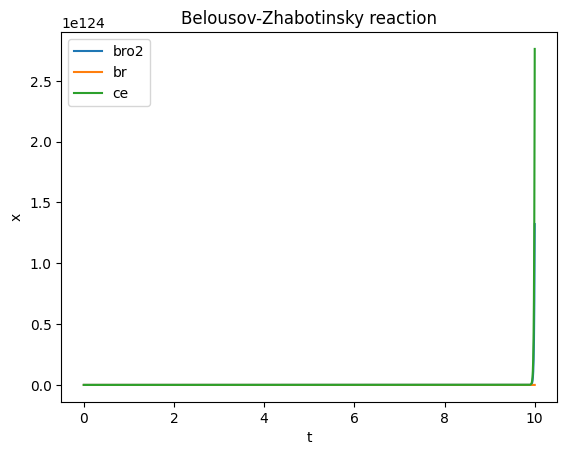

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def BZ_system(t, x):
  hbro2, br, ce = x

  k1 = 5.64
  k2 = 3e6
  k3 = 80
  k4 = 5e3
  k5 = 1.6
  f = 1
  bro3 = 1
  ch2cooh = 1

  v1 = k1*bro3*br
  v2 = k2*hbro2*br
  v3 = k3*bro3*hbro2
  v4 = k4*hbro2**2
  v5 = k5*ch2cooh*ce

  dhbro2dt = v1 - v2 + v3 - 2*v4
  dbrdt = -v1 -v2 + 0.5*f*v5
  dcedt = 2*v3 - v5

  return [dhbro2dt, dbrdt, dcedt]

x0 = [1,1,1]

t_span = [0, 20]
t_eval = np.linspace(0, 20, 100)

sol = sp.integrate.solve_ivp(BZ_system, t_span, x0, t_eval=t_eval)

t = sol.t
y0 = sol.y[0]
y1 = sol.y[1]
y2 = sol.y[2]

plt.figure()
plt.plot(t, y0, label = '$HBrO_2$')
plt.plot(t, y1, label = '$Br^-$')
plt.plot(t, y2, label = '$Ce^{4+}$')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Belousov-Zhabotinsky reaction')
plt.legend()
plt.show()

# A spatial model

To make the spatial model, we need to add a diffusion mechanic to our system of equations.

$$
\frac{dx}{dt} = f(t,x,y,...) + D_x \nabla ^2 x
$$

Where $\nabla ^2x$ is the Laplacian of $x$. Here you do not need to concern yourself with what the Laplacian does, you just need to know that, for any point in space, the diffusion term is negative if the concentration at that point is bigger than its surroundings, and negative otherwise. The speed of this process is controlled by the diffusion coefficient $D_x$.

### Exercise
1. Rewrite the differential equations from the previous exercise, adding the diffusion term.

# Implementing diffusion

The first thing we need for a spatial model are spatial dimensions. We will work with only 2 dimensions, and in python this can be done by discretizing space into a grid of cells (just like in chess), which can then be easily represented as a matix.

You can now consider each of these cells as having a distinct set of reactions, and the only interaction between cells are through diffusion.

The second thing we need is a model for diffusion. It is possible to calculate the laplacian ($\nabla^2$ operator) from a grid as well, once the laplacian is calulated, we just need to multiply it by the diffusion coefficient.


The algorithm implementation can then follow these steps:
1. Initialize 3 grids, with the initial concentrations for each of the variable chemicals.
2. First update the concentrations of the chemicals using the reaction part of the differential equations. You cab use the Euler method for this, with an appropriate step size $h$.
3. Update the concentrations using the diffusion part.
4. Repeat 2 and 3 for a fixed amount of steps.

### Exercise
1. Using the above algorithm, we do not make use of a diffusion coefficient. However, the time step $h$ can effectively be seen as playing the same role. Why?

## Simplifying the problem

To be able to solve all this in the workgroup, we need to make to further simplifications to the problem. The first is to simplify the set of reaction updates to:

$$
\mathrm{A} + \mathrm{B}  \rightarrow 2A   \\
\mathrm{B} + \mathrm{C}  \rightarrow 2B   \\
\mathrm{C} + \mathrm{A}  \rightarrow 2C   \\
$$

With rates $\alpha$, $\beta$, and $\gamma$ respectivelly. This makes the update rule for the reactions:

$$
[\mathrm{A}]_{t+1} = [\mathrm{A}]_t + [\mathrm{A}]_t(\alpha[\mathrm{B}]_t - \gamma[\mathrm{C}]_t)\\
[\mathrm{B}]_{t+1} = [\mathrm{B}]_t + [\mathrm{B}]_t(\beta[\mathrm{C}]_t - \alpha[\mathrm{A}]_t)\\
[\mathrm{A}]_{t+1} = [\mathrm{C}]_t + [\mathrm{C}]_t(\gamma[\mathrm{A}]_t - \beta[\mathrm{B}]_t)\\
$$

These set of updates are much faster to calculate, and you will not run into many of the numerical issues in trying to solve the differential equations.

We will also simplify the diffusion process by a simpler model that achieves the same effect. At each point in time, we can have a first order approximation of diffusion by updating a cells value for the concentration of a chemical to the average if itself and it's 8 neighbours.

### Exercise

1. Convice yourself that the simplification of the reaction
1. Implement the algorithm above. Use $\alpha = 1.2$, $\beta = \gamma = 1$.
You can either implement the algorithm on your own, or use the skeleton code below. The code below uses a convolution to perform the averaging, which results in a much higher speed of computation.
2. Test different initializations. One where all cells have the same concentration, and one where they are random. You might want to use ``np.ones`` and ``np.random.random`` functions for this. What do you see? Can you make a hypothesis why they are different?


In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Size of grid
Nx = 600
Ny = 450

# Number of steps
n_steps = 300

# Initialize grid
# a = np.zeros((Nx,Ny))
# b = np.zeros((Nx,Ny))
# c = np.zeros((Nx,Ny))

a = np.random.rand(Nx,Ny) *0.5
b = np.random.rand(Nx,Ny) *0.5
c = np.random.rand(Nx,Ny) *0.5

alpha = 1.2
beta = 1
gamma = 1

average_kernel = np.ones((3,3)) / 9

for i in range(n_steps):
  # REACTION UPDATE HERE

  a_new = a + a*(alpha*b-gamma*c)
  b_new = b + b*(beta*c-alpha*a)
  c_new = c + c*(gamma*a-beta*b)

  a = a_new
  b = b_new
  c = c_new

  # Diffusion update
  a = convolve2d(a, average_kernel, mode='same', boundary='wrap')
  b = convolve2d(b, average_kernel, mode='same', boundary='wrap')
  c = convolve2d(c, average_kernel, mode='same', boundary='wrap')


  # Visualize every 10 steps
  if i % 20 == 0:
      plt.figure(figsize=(18, 6))

      plt.subplot(1, 3, 1)
      plt.imshow(a, cmap=plt.cm.bwr)
      plt.title(f"a (step {i})")
      plt.colorbar()

      plt.subplot(1, 3, 2)
      plt.imshow(b, cmap=plt.cm.bwr)
      plt.title(f"b (step {i})")
      plt.colorbar()

      plt.subplot(1, 3, 3)
      plt.imshow(c, cmap=plt.cm.bwr)
      plt.title(f"c (step {i})")
      plt.colorbar()

      plt.tight_layout()
      plt.show()






# With a nice animation

In [ ]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
rc('animation', embed_limit=128)

#Size of grid
Nx = 600
Ny = 450

# Number of steps
n_steps = 300

alpha = 1.2
beta = 1
gamma = 1

# Initialize grid
a = np.random.rand(Nx,Ny) *0.5
b = np.random.rand(Nx,Ny) *0.5
c = np.random.rand(Nx,Ny) *0.5

# # Initialize grid
# a = np.zeros((Nx,Ny))
# b = np.zeros((Nx,Ny))
# c = np.zeros((Nx,Ny))

average_kernel = np.ones((3,3)) / 9

fig, ax = plt.subplots()
ims = []

for i in range(n_steps):
  # REACTION UPDATE HERE
  a_new = a + a*(alpha*b-gamma*c)
  b_new = b + b*(beta*c-alpha*a)
  c_new = c + c*(gamma*a-beta*b)

  a = a_new
  b = b_new
  c = c_new

  # Diffusion update
  a = convolve2d(a, average_kernel, mode='same', boundary='wrap')
  b = convolve2d(b, average_kernel, mode='same', boundary='wrap')
  c = convolve2d(c, average_kernel, mode='same', boundary='wrap')
  im = ax.imshow(a, animated=True, cmap=plt.cm.bwr)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani